---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 15.2 Composite numerical integration
---

## Composite quadrature methods

We can obtain improved approximations of $\int_a^b f(x)\,dx$ by dividing the interval $[a,b]$ into $r$ equal subintervals:

$$[t_0,t_1], \quad [t_1,t_2], \quad \ldots, \quad [t_{r-1},t_r],$$

where $t_0 = a$ and $t_r = b$.  Then

$$
\int_a^b f(x)\,dx = \sum_{i=1}^r \int_{t_{i-1}}^{t_i} f(x)\,dx.
$$

The length of each subinterval is

$$ h = \frac{b - a}{r},$$

and $t_i = a + ih$, for $i = 0, 1, \ldots, r$.

---

### Composite midpoint rule

From the midpoint rule for the $i^{\mathrm{th}}$ interval $[t_{i-1},t_i]$, we have

$$
\begin{split}
\int_{t_{i-1}}^{t_i} f(x)\,dx 
& = (t_i - t_{i-1})\,f\paren{\frac{t_{i-1} + t_i}{2}} + \frac{f''(\xi_i)}{24}(t_i - t_{i-1})^3 \\
& = h f(a + (i - 1/2)h) + \frac{f''(\xi_i)}{24} h^3, \\
\end{split}
$$

for some $\xi_i \in [t_{i-1},t_i]$.

Thus, we have:

$$
\begin{split}
\int_a^b f(x)\,dx 
&= \sum_{i=1}^r \int_{t_{i-1}}^{t_i} f(x)\,dx \\
&= \sum_{i=1}^r \brack{ h f(a + (i - 1/2)h) + \frac{f''(\xi_i)}{24} h^3 }\\
&= h \sum_{i=1}^r f(a + (i - 1/2)h) + \paren{\frac{1}{r} \sum_{i=1}^r f''(\xi_i)} \frac{r h^3}{24} .\\
\end{split}
$$

By the **Intermediate Value Theorem**, there is a $\xi \in [a,b]$ such that

$$f''(\xi) = \frac{1}{r} \sum_{i=1}^r f''(\xi_i).$$

Therefore, we obtain the **composite midpoint rule**:

$$
\fbox{${\displaystyle
\int_a^b f(x)\,dx = h \sum_{i=1}^r f(a + (i - 1/2)h) + \frac{f''(\xi)}{24} (b - a) h^2, 
\quad \xi \in [a,b],
}$}
$$

which has **order two accuracy**:

$$
\fbox{${\displaystyle
\abs{\int_a^b f(x)\,dx - h \sum_{i=1}^r f(a + (i - 1/2)h)} \leq \frac{\norm{f''}}{24} (b - a) h^2 = \mathcal{O}(h^2).
}$}
$$

---
## Example

$$
\int_0^1 \paren{\frac{4}{1+x^2}} dx = \pi
$$

In [10]:
using Printf

function midpointrule()
    a, b = 0., 1.
    f(x) = 4/(1 + x^2)
    intf = pi

    @printf "%5s %14s %12s %12s\n" "h" "approx" "error" "time"
    for r = [1e1 1e2 1e3 1e4 1e5 1e6 1e7]
        start = time()
        h = (b - a)/r

        # Using the Midpoint Rule        
        approx = h*sum(f(a + (i - 1/2)*h) for i=1:r)

        err = abs(intf - approx)
        @printf "%5.0e %14.10f %12.5e %12.8f\n" h approx err time()-start
    end
end

midpointrule (generic function with 1 method)

In [12]:
midpointrule()

    h         approx        error         time
1e-01   3.1424259850  8.33331e-04   0.00000405
1e-02   3.1416009869  8.33333e-06   0.00000119
1e-03   3.1415927369  8.33333e-08   0.00001287
1e-04   3.1415926544  8.33341e-10   0.00013113
1e-05   3.1415926536  8.36842e-12   0.00122595
1e-06   3.1415926536  2.88658e-14   0.01351285
1e-07   3.1415926536  6.21725e-14   0.03625989


---

### Composite trapezoidal rule

From the trapezoidal rule for the $i^{\mathrm{th}}$ interval $[t_{i-1},t_i]$, we have

$$
\begin{split}
\int_{t_{i-1}}^{t_i} f(x)\,dx 
& = \frac{t_i - t_{i-1}}{2}\brack{f(t_{i-1}) + f(t_i)} - \frac{f''(\xi_i)}{12}(t_i - t_{i-1})^3 \\
& = \frac{h}{2}\brack{f(t_{i-1}) + f(t_i)} - \frac{f''(\xi_i)}{12}h^3 \\
\end{split}
$$

for some $\xi_i \in [t_{i-1},t_i]$.

Thus, we have:

$$
\begin{split}
\int_a^b f(x)\,dx 
&= \sum_{i=1}^r \int_{t_{i-1}}^{t_i} f(x)\,dx \\
&= \sum_{i=1}^r \brack{ \frac{h}{2}\brack{f(t_{i-1}) + f(t_i)} - \frac{f''(\xi_i)}{12}h^3 }\\
&= \frac{h}{2} \brack{f(t_0) + 2f(t_1) + \cdots + 2f(t_{r-1}) + f(t_r)} \\
&\quad -  \frac{1}{r} \paren{\sum_{i=1}^r f''(\xi_i)} \frac{rh^3}{12}. \\
\end{split}
$$

Again, by the **Intermediate Value Theorem**, there is a $\xi \in [a,b]$ such that

$$f''(\xi) = \frac{1}{r} \sum_{i=1}^r f''(\xi_i).$$

Therefore, we obtain the **composite trapezoidal rule**:

$$
\fbox{${\displaystyle
\int_a^b f(x)\,dx = \frac{h}{2}\brack{f(a) + 2 \sum_{i=1}^{r-1} f(a + ih) + f(b)} - \frac{f''(\xi)}{12} (b - a) h^2, 
\quad \xi \in [a,b],
}$}
$$

which has **order two accuracy**:

$$
\fbox{${\displaystyle
\abs{\int_a^b f(x)\,dx - \frac{h}{2}\brack{f(a) + 2 \sum_{i=1}^{r-1} f(a + ih) + f(b)}} \leq  \frac{\norm{f''}}{12} (b - a) h^2 = \mathcal{O}(h^2).
}$}
$$

---
## Example

The [error function](https://en.wikipedia.org/wiki/Error_function) is

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt.
$$

Thus, 

$$
\int_0^1 e^{-x^2} dx = \frac{\sqrt{\pi}}{2}\mathrm{erf}(1).
$$

In [13]:
using SpecialFunctions

function traprule()
    a, b = 0., 1.
    f(x) = exp(-x^2)
    intf = √π/2*erf(1.)

    @printf "%5s %14s %12s %12s\n" "h" "approx" "error" "time"
    for r = [1e1 1e2 1e3 1e4 1e5 1e6 1e7]
        start = time()
        h = (b - a)/r

        # Using the Trapezoidal Rule
        approx = f(a)
        approx += 2*sum(f(a + i*h) for i=1:r-1)
        approx += f(b)
        approx *= h/2

        err = abs(intf - approx)
        @printf "%5.0e %14.10f %12.5e %12.8f\n" h approx err time()-start
    end
end

traprule (generic function with 1 method)

In [14]:
erf(1.0)

0.8427007929497149

In [16]:
traprule()

    h         approx        error         time
1e-01   0.7462107961  6.13337e-04   0.00000405
1e-02   0.7468180015  6.13134e-06   0.00000191
1e-03   0.7468240715  6.13132e-08   0.00002289
1e-04   0.7468241322  6.13133e-10   0.00027895
1e-05   0.7468241328  6.13964e-12   0.00425196
1e-06   0.7468241328  4.34097e-14   0.02193499
1e-07   0.7468241328  7.90479e-14   0.06738305


---

### Composite Simpson rule

The Simpson rule for the $k^{\mathrm{th}}$ _pair_ of intervals $[t_{2k-2},t_{2k}]$ gives us

$$
\begin{split}
\int_{t_{2k-2}}^{t_{2k}} f(x)\,dx 
& = \frac{t_{2k} - t_{2k-2}}{6}\brack{f(t_{2k-2}) + 4f\paren{\frac{t_{2k-2} + t_{2k}}{2}} + f(t_{2k})} -\frac{f''''(\xi_k)}{90} \paren{\frac{t_{2k} - t_{2k-2}}{2}}^5 \\
& = \frac{h}{3}\brack{f(t_{2k-2}) + 4f(t_{2k-1}) + f(t_{2k})} -\frac{f''''(\xi_k)}{90} h^5 \\
\end{split}
$$

for some $\xi_k \in [t_{2k-2},t_{2k}]$.

Thus, we have ($r$ must be even):

$$
\begin{split}
\int_a^b f(x)\,dx 
&= \sum_{k=1}^{r/2} \int_{t_{2k-2}}^{t_{2k}} f(x)\,dx \\
&= \sum_{k=1}^{r/2} \brack{\frac{h}{3}\brack{f(t_{2k-2}) + 4f(t_{2k-1}) + f(t_{2k})} -\frac{f''''(\xi_k)}{90} h^5} \\
&= \frac{h}{3} \brack{f(t_0) + 4f(t_1) + 2f(t_2) + \cdots + 2f(t_{r-2}) + 4f(t_{r-1}) + f(t_r) } 
\\
& \qquad -\frac{1}{r/2}\paren{\sum_{k=1}^{r/2} f''''(\xi_k)} \frac{h^5}{90}\frac{r}{2}. \\
\end{split}
$$

Once more, by the **Intermediate Value Theorem**, there is a $\xi \in [a,b]$ such that

$$f''''(\xi) = \frac{1}{r/2} \sum_{i=1}^{r/2} f''''(\xi_i).$$

Therefore, we obtain the **composite Simpson rule**:

$$
\fbox{${\displaystyle
\int_a^b f(x)\,dx = \frac{h}{3}\brack{f(a) + 4 \sum_{k=1}^{r/2} f(t_{2k-1}) + 2 \sum_{k=1}^{r/2-1} f(t_{2k}) + f(b)}
- \frac{f''''(\xi)}{180} (b - a) h^4
}$}
$$

for some $\xi \in [a,b]$, which has **order four accuracy**:

$$
\fbox{${\displaystyle
\abs{\int_a^b f(x)\,dx - \frac{h}{3}\brack{f(a) + 4 \sum_{k=1}^{r/2} f(t_{2k-1}) + 2 \sum_{k=1}^{r/2-1} f(t_{2k}) + f(b)}} \leq
\frac{\norm{f''''}}{180} (b - a) h^4 = \mathcal{O}(h^4).
}$}
$$

---
## Example

$$
\int_0^1 e^x\,dx = e - 1
$$

In [22]:
function simpsonrule()
    a, b = 0., 1.
    f(x) = exp(x)
    intf = exp(1.0) - 1

    @printf "%5s %14s %12s %12s\n" "h" "approx" "error" "time"
    for r = [1e1 1e2 1e3 1e4 1e5]
        start = time()
        h = (b - a)/r

        # Using the Simpson Rule
        approx = f(a)
        approx += 4*sum(f(a + (2k-1)*h) for k=1:r/2)
        approx += 2*sum(f(a + (2k)*h) for k=1:r/2-1)
        approx += f(b)
        approx *= h/3

        err = abs(intf - approx)
        @printf "%5.0e %14.10f %12.5e %12.8f\n" h approx err time()-start
    end
end

simpsonrule (generic function with 1 method)

In [24]:
simpsonrule()

    h         approx        error         time
1e-01   1.7182827819  9.53466e-07   0.00000596
1e-02   1.7182818286  9.54592e-11   0.00000405
1e-03   1.7182818285  1.02141e-14   0.00002289
1e-04   1.7182818285  6.66134e-16   0.00024891
1e-05   1.7182818285  6.66134e-15   0.00234723


In [25]:
traprule()

    h         approx        error         time
1e-01   0.7462107961  6.13337e-04   0.00000596
1e-02   0.7468180015  6.13134e-06   0.00000310
1e-03   0.7468240715  6.13132e-08   0.00002289
1e-04   0.7468241322  6.13133e-10   0.00022101
1e-05   0.7468241328  6.13964e-12   0.00226998
1e-06   0.7468241328  4.34097e-14   0.02166104
1e-07   0.7468241328  7.90479e-14   0.06735086


In [26]:
midpointrule()

    h         approx        error         time
1e-01   3.1424259850  8.33331e-04   0.00000405
1e-02   3.1416009869  8.33333e-06   0.00000095
1e-03   3.1415927369  8.33333e-08   0.00000906
1e-04   3.1415926544  8.33341e-10   0.00008416
1e-05   3.1415926536  8.36842e-12   0.00083899
1e-06   3.1415926536  2.88658e-14   0.01135111
1e-07   3.1415926536  6.21725e-14   0.03592086


---

## Composite quadrature rules summary

$$
\begin{align}
\\
\int_a^b f(x)\,dx &= h \sum_{i=1}^r f(a + (i - 1/2)h) + \frac{f''(\xi)}{24} (b - a) h^2 
 \quad &\text{(Midpoint)} \\\\
\int_a^b f(x)\,dx &= \frac{h}{2}\brack{f(a) + 2 \sum_{i=1}^{r-1} f(a + ih) + f(b)} - \frac{f''(\xi)}{12} (b - a) h^2  
\quad &\text{(Trapezoidal)} \\\\
\int_a^b f(x)\,dx &= \frac{h}{3}\brack{f(a) + 4 \sum_{k=1}^{r/2} f(t_{2k-1}) + 2 \sum_{k=1}^{r/2-1} f(t_{2k}) + f(b)} - \frac{f''''(\xi)}{180} (b - a) h^4
\quad &\text{(Simpson)} \\\\
\end{align}
$$

In each case, $\xi$ is some unknown point in the interval $[a,b]$.

---

## Computational cost

We measure the computational cost of a quadrature rule by counting the number of function evaluations required.

As $h$ gets smaller, the number of subintervals $r$ gets larger.

We can see from the above quadrature rules that we need:

- $r$ function evaluations for the Midpoint rule;
- $r + 1$ function evaluations for the Trapezoidal rule;
- $r + 1$ function evaluations for the Simpson rule.

Thus, the Simpson rule is the most efficient in terms of number of function evaluations versus the order of accuracy.

---

## Numerical integration of noisy data

Numerical integration is not sensitive to random noise in the function values.

Let 

$$f(x) = e^x \sin(3x).$$ 

Then

$$ \int_0^x f'(t)\, dt = f(x) - f(0) = f(x) . $$

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (4), incompatible header (14))


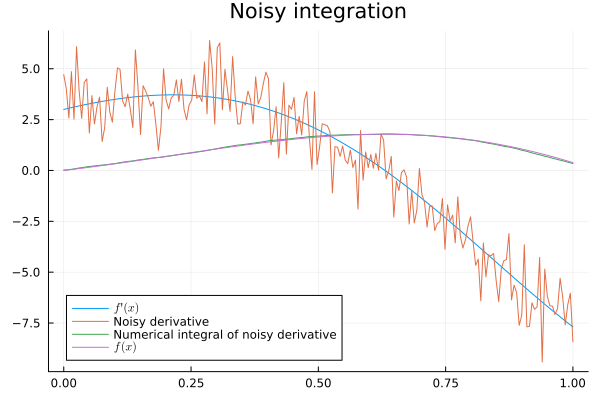

In [27]:
using Plots, LaTeXStrings

f(x)  = exp(x)*(                sin(3x))
f1(x) = exp(x)*(  3cos(3x) +    sin(3x))

a, b, r = 0, 1, 200

xx = range(a, b, length=r)
h = xx[2] - xx[1]

yyp = f1.(xx)

yypn = yyp + randn(size(yyp))  # add noise to derivative values

# Using the composite trapezoid rule on the noisy data
yyn = h/2*[yypn[1] + 2*sum(yypn[2:k-1]) + yypn[k] for k=1:r]

yytrue = f.(xx)

plot(title="Noisy integration", legend=:bottomleft)
plot!(xx, yyp, label=L"f'(x)")
plot!(xx, yypn, label="Noisy derivative")
plot!(xx, yyn, label="Numerical integral of noisy derivative")
plot!(xx, yytrue, label=L"f(x)")

---